In [1]:
# Load in the train and test datasets
import pandas as pd
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [6]:
train_rf = train.drop(['Name','Ticket'], axis=1)
test_rf    = test.drop(['Name','Ticket'], axis=1)

'''
train_rf["Embarked"] = train_rf["Embarked"].fillna("N")
train_rf['Embarked'] = train_rf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2,'N':4} ).astype(int)
test_rf['Embarked'] = test_rf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2,'N':4} ).astype(int)
'''

train_rf["Embarked"] = train_rf["Embarked"].fillna("C")
train_rf['Embarked'] = train_rf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_rf['Embarked'] = test_rf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

test_rf["Fare"]=test_rf["Fare"].fillna(test_rf["Fare"].median())


train_rf["Fare"].loc[(train_rf["Fare"] >= 0) & (train_rf["Fare"] <20)] = 1
test_rf["Fare"].loc[(test_rf["Fare"] >= 0) & (test_rf["Fare"] <20)] = 1
train_rf["Fare"].loc[(train_rf["Fare"] >= 20) & (train_rf["Fare"] <40)] =2
test_rf["Fare"].loc[(test_rf["Fare"] >=20) & (test_rf["Fare"] <40)] = 2
train_rf["Fare"].loc[(train_rf["Fare"] >= 40) & (train_rf["Fare"] <60)] =3
test_rf["Fare"].loc[(test_rf["Fare"] >=40) & (test_rf["Fare"] <60)] = 3
train_rf["Fare"].loc[(train_rf["Fare"] >= 60) & (train_rf["Fare"] <80)] =4
test_rf["Fare"].loc[(test_rf["Fare"] >=60) & (test_rf["Fare"] <80)] = 4
train_rf["Fare"].loc[(train_rf["Fare"] >= 80) & (train_rf["Fare"] <100)] =5
test_rf["Fare"].loc[(test_rf["Fare"] >=80) & (test_rf["Fare"] <100)] = 5
train_rf["Fare"].loc[train_rf["Fare"] >= 100] =6
test_rf["Fare"].loc[test_rf["Fare"] >=100] = 6




###
train_rf["Age"]=train_rf["Age"].fillna(train_rf["Age"].median())
test_rf["Age"]=test_rf["Age"].fillna(test_rf["Age"].median())

'''
train_rf["Age"].loc[(train_rf["Age"] > 0) & (train_rf["Age"] <5)] = 1
test_rf["Age"].loc[(test_rf["Age"] > 0) & (test_rf["Age"] <5)] = 1
train_rf["Age"].loc[(train_rf["Age"] >= 5) & (train_rf["Age"] <10)] = 2
test_rf["Age"].loc[(test_rf["Age"] >=5) & (test_rf["Age"] <10)] = 2
train_rf["Age"].loc[(train_rf["Age"] >= 10) & (train_rf["Age"] <15)] = 3
test_rf["Age"].loc[(test_rf["Age"] >=10) & (test_rf["Age"] <15)] = 3
train_rf["Age"].loc[(train_rf["Age"] >= 15) & (train_rf["Age"] <20)] = 4
test_rf["Age"].loc[(test_rf["Age"] >=15) & (test_rf["Age"] <20)] = 4
train_rf["Age"].loc[(train_rf["Age"] >= 20) & (train_rf["Age"] <25)] =5
test_rf["Age"].loc[(test_rf["Age"] >=20) & (test_rf["Age"] <25)] = 5
train_rf["Age"].loc[(train_rf["Age"] >= 25) & (train_rf["Age"] <30)] =6
test_rf["Age"].loc[(test_rf["Age"] >=25) & (test_rf["Age"] <30)] = 6
train_rf["Age"].loc[(train_rf["Age"] >= 30) & (train_rf["Age"] <35)] =7
test_rf["Age"].loc[(test_rf["Age"] >=30) & (test_rf["Age"] <35)] = 7
train_rf["Age"].loc[(train_rf["Age"] >= 35) & (train_rf["Age"] <40)] =7
test_rf["Age"].loc[(test_rf["Age"] >=35) & (test_rf["Age"] <40)] = 7
train_rf["Age"].loc[(train_rf["Age"] >= 40) & (train_rf["Age"] <50)] =8
test_rf["Age"].loc[(test_rf["Age"] >=40) & (test_rf["Age"] <50)] = 8
train_rf["Age"].loc[train_rf["Age"] >= 50] =9
test_rf["Age"].loc[test_rf["Age"] >=50] = 9
'''

train_rf["Age"].loc[(train_rf["Age"] > 0) & (train_rf["Age"] <17)] = 1
test_rf["Age"].loc[(test_rf["Age"] > 0) & (test_rf["Age"] <17)] = 1
train_rf["Age"].loc[(train_rf["Age"] >= 17) & (train_rf["Age"] <30)] =20
test_rf["Age"].loc[(test_rf["Age"] >=17) & (test_rf["Age"] <30)] = 20
train_rf["Age"].loc[(train_rf["Age"] >= 40) & (train_rf["Age"] <50)] =10
test_rf["Age"].loc[(test_rf["Age"] >=40) & (test_rf["Age"] <50)] = 10
train_rf["Age"].loc[train_rf["Age"] >= 50] =4
test_rf["Age"].loc[test_rf["Age"] >=50] = 4


train_rf.drop("Cabin",axis=1,inplace=True)
test_rf.drop("Cabin",axis=1,inplace=True)

train_rf['Family'] =  train_rf["Parch"] + train_rf["SibSp"]
test_rf['Family'] =test_rf["Parch"] + test_rf["SibSp"]

'''
train_rf['Family'].loc[train_rf['Family'] > 0] = 1
train_rf['Family'].loc[train_rf['Family'] == 0] = 0
test_rf['Family'].loc[test_rf['Family'] > 0] = 1
test_rf['Family'].loc[test_rf['Family'] == 0] = 0
'''

train_rf = train_rf.drop(['SibSp','Parch'], axis=1)
test_rf   = test_rf.drop(['SibSp','Parch'], axis=1)

train_rf['Sex'] = train_rf['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_rf['Sex'] = test_rf['Sex'].map( {'female': 0, 'male': 1} ).astype(int)




# define training and testing sets
Y = train_rf["Survived"]
X = train_rf.drop(["Survived","PassengerId"],axis=1)

test_rf = test_rf.drop("PassengerId",axis=1).copy()

C:\Users\ferra\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


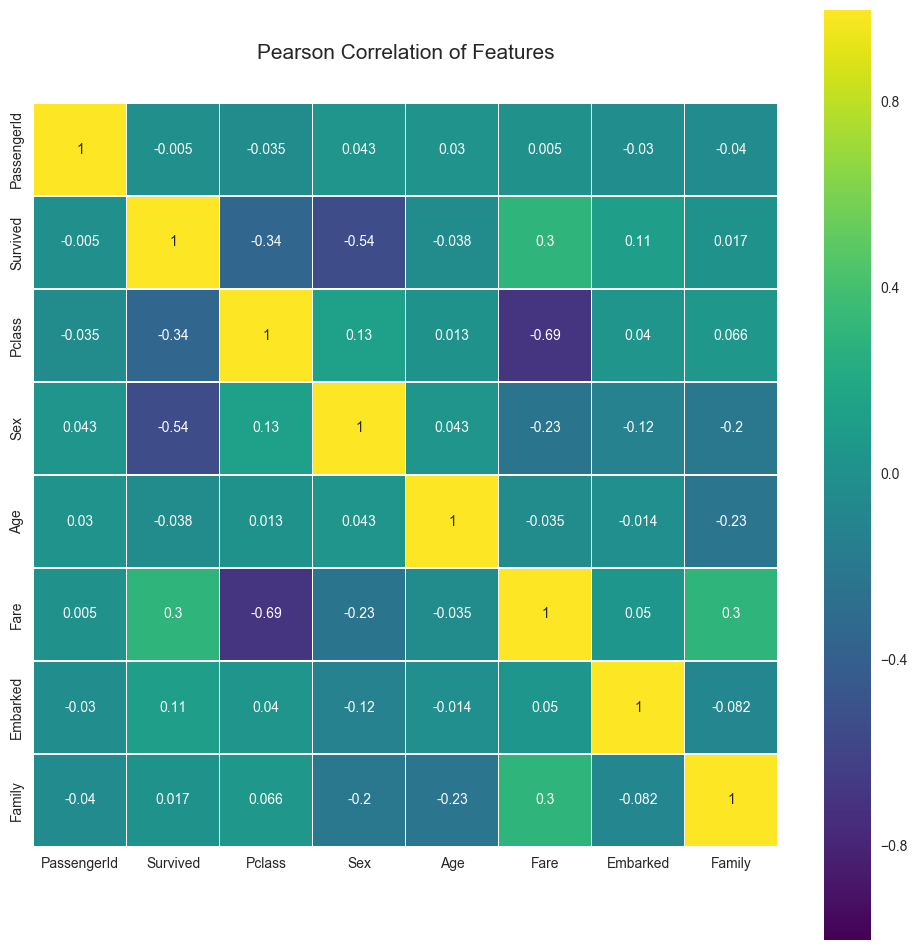

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_rf.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
seed=5
# Initialize a Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators = 100,oob_score=True,random_state=seed) 
lr = LogisticRegression(random_state=seed) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = clf.fit( X, Y )
forest2 = lr.fit( X, Y )
print("random forest:")
print(clf.score(X, Y))
print(clf.oob_score_)
print("logistic:")
print(lr.score(X, Y))

random forest:
0.885521885522
0.79012345679
logistic:
0.796857463524


In [9]:
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

kf = KFold(train.shape[0], n_folds=5, random_state=seed)
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=seed)

prediction = cross_validation.cross_val_predict(clf, X,Y,cv=kf)
predictions = pd.Series(prediction)
scores = cross_val_score(clf, X, Y,scoring='f1', cv=kf)
scores2 = cross_val_score(lr, X, Y,scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print("random forest")
print(scores.mean())
print("logistic:")
print(scores2.mean())

random forest
0.711192647649
logistic:
0.702894587155


In [13]:
import sklearn
sklearn.__version__

'0.18.1'

In [82]:
from sklearn import metrics
predicted = clf.predict(X_test)
expected=Y_test
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

 

             precision    recall  f1-score   support

          0       0.81      0.85      0.83        54
          1       0.76      0.69      0.72        36

avg / total       0.79      0.79      0.79        90

[[46  8]
 [11 25]]


In [64]:
predicted = clf.predict(test_rf)

In [65]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predicted
    })
submission.to_csv('titanic.csv', index=False)

In [44]:
sample_leaf_options = [1,5,10,50,100,200,500]
from sklearn.metrics import roc_auc_score

for leaf_size in sample_leaf_options :
    model = RandomForestClassifier(n_estimators= 200, oob_score =True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = leaf_size)

model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=500,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
            verbose=0, warm_start=False)

In [45]:
roc_auc_score(Y,model.oob_prediction)

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_prediction'

In [1]:
import sklearn
sklearn.__version__

'0.18.1'